In [1]:
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
toyota=pd.read_csv('\\Users\\piyus\\Documents\\Toyoto_Corrola.csv')
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
toyota_=toyota.iloc[:,2:]
toyota_.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [4]:
toyota_.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
toyota_.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


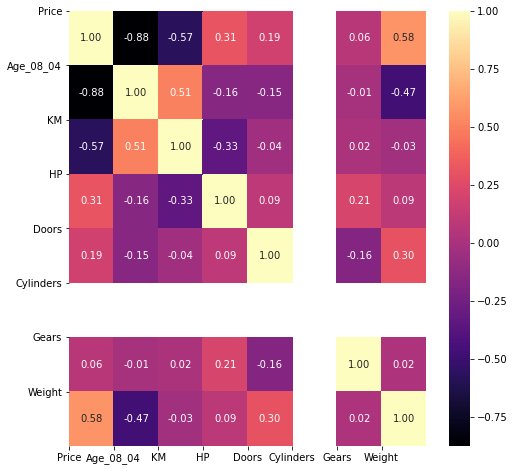

In [6]:
corr = toyota_.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [7]:
X = toyota_.drop('Price', axis = 1).values
y = toyota_.iloc[:, 0].values.reshape(-1,1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 7)
Shape of X_test:  (359, 7)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


In [10]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)


CV:  0.8523221818714573
R2_score (train):  0.8637629182165234
R2_score (test):  0.859599539428205
RMSE:  1411.526546498624


In [12]:
y_prediction=regressor_linear.predict(X_test)
y_prediction

array([[11353.81712638],
       [ 8940.73170234],
       [ 9492.38293406],
       [ 8974.68423274],
       [10133.11501363],
       [ 7801.24670415],
       [ 8811.67928835],
       [ 8332.88429872],
       [14164.01535588],
       [13206.80256013],
       [ 9368.8064846 ],
       [ 9366.97191397],
       [13025.90421368],
       [13148.07590554],
       [ 9758.60687862],
       [ 8294.93656321],
       [12355.03716799],
       [17327.2423099 ],
       [ 7299.51211411],
       [ 9211.85767888],
       [12855.7060522 ],
       [17820.22524579],
       [ 7891.18507783],
       [10541.27087288],
       [ 7434.38374186],
       [15973.21747396],
       [ 9596.81760527],
       [ 7255.95375108],
       [15506.95938938],
       [14623.14361871],
       [ 8145.54932542],
       [ 9973.61214759],
       [ 8538.45318046],
       [10144.1750506 ],
       [10323.08288681],
       [ 8021.80087354],
       [ 8950.62660524],
       [10008.02022131],
       [16213.00977906],
       [ 9498.90573888],
